In [3]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
#df = pd.read_excel(r'/kaggle/input/distribution-coefficient-data/Filled data.xlsx')
dfs = pd.read_excel(r'/kaggle/input/simulation/SEESPEC_DATA_U6 - Copy.xlsx')


In [5]:
#df1= df[['U-AQU','H-AQU','D-U','D-H']].dropna()
#df1= np.absolute(df1)
#df1 = df1.reset_index(drop=True)

In [6]:
df2 = dfs[['U-AQU','H-AQU','D-H','D-U']]
df3 = df2.reset_index(drop=True)
#df3 = pd.concat([df1,df2],axis=0)

In [7]:
df3.head

<bound method NDFrame.head of          U-AQU     H-AQU       D-H       D-U
0     0.004142  0.009887  0.011447  0.014387
1     0.003648  0.067777  0.040247  0.151655
2     0.003093  0.123137  0.063935  0.358583
3     0.002610  0.176556  0.084726  0.609888
4     0.002195  0.228349  0.103660  0.914570
...        ...       ...       ...       ...
9995  0.788317  5.608535  0.026646  0.598982
9996  0.788917  5.667673  0.026609  0.597766
9997  0.789522  5.726806  0.026574  0.596540
9998  0.790133  5.785933  0.026541  0.595306
9999  0.790750  5.845053  0.026509  0.594062

[10000 rows x 4 columns]>

In [8]:
def normalised(database):
    mean = np.mean(database, axis=0)
    std = np.std(database, axis=0)
    return((database-mean)/std)

In [9]:
def stand(database):
    max = np.max(database, axis=0)
    min = np.min(database, axis=0)
    return((database-min)/(max-min))

In [10]:
print(f"max {np.max(df3['D-H'])} | min {np.min(df3['D-H'])}")

max 0.234801988 | min 0.011447075


In [11]:
df3.loc[:,['U-AQU']] = normalised(df3.loc[:,['U-AQU']])
df3.loc[:,['H-AQU']] = normalised(df3.loc[:,['H-AQU']])
df3.loc[:,['D-U']] = stand(df3.loc[:,['D-U']])
df3.loc[:,['D-H']] = stand(df3.loc[:,['D-H']])

In [12]:
df3.head

<bound method NDFrame.head of          U-AQU     H-AQU       D-H       D-U
0    -1.133781 -1.692565  0.000000  0.000000
1    -1.135797 -1.657590  0.128944  0.004375
2    -1.138066 -1.624145  0.234999  0.010969
3    -1.140038 -1.591872  0.328082  0.018978
4    -1.141734 -1.560582  0.412855  0.028689
...        ...       ...       ...       ...
9995  2.068470  1.689826  0.068048  0.018631
9996  2.070920  1.725554  0.067883  0.018592
9997  2.073393  1.761278  0.067726  0.018553
9998  2.075888  1.796999  0.067576  0.018514
9999  2.078406  1.832717  0.067435  0.018474

[10000 rows x 4 columns]>

In [13]:
Train , Test = train_test_split(df3, test_size=0.2, random_state=69)
Train_in = Train.loc[:,['U-AQU','H-AQU']]
Test_in = Test.loc[:,['U-AQU','H-AQU']]
Train_out = Train.loc[:,['D-U','D-H']]
Test_out = Test.loc[:,['D-U','D-H']]


In [14]:
#converting to Tensors
xtr = torch.tensor(Train_in.values, dtype=torch.float32)
xte = torch.tensor(Test_in.values, dtype=torch.float32)
ytr = torch.tensor(Train_out.values, dtype=torch.float32)
yte = torch.tensor(Test_out.values, dtype=torch.float32)

In [15]:
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2,7)
        #self.layer2 = nn.Linear(10,7)
        self.layer3 = nn.Linear(7,5)
        self.layer4 = nn.Linear(5,2)
            
    def forward(self,x):
        y = torch.tanh(self.layer1(x))
        #y = torch.tanh(self.layer2(y))
        y = torch.tanh(self.layer3(y))
        y = self.layer4(y)
        return y

In [16]:
torch.manual_seed(123)
model1 = model()
lrate = 0.1

n_iters = 25000
optimizer = torch.optim.Adamax(model1.parameters(), lr = lrate) 
loss = nn.MSELoss()

In [17]:
for i in range(n_iters):
    optimizer.zero_grad()
    y_pred = model1(xtr)
    l = loss(y_pred,ytr)
    l.backward()
    optimizer.step()
    
    training_rmse = torch.sqrt(l)
    
    if i%100 == 0:
        print(f"Epoch : {i} | RMSE loss : {training_rmse} | MSE loss : {l}")

Epoch : 0 | RMSE loss : 0.4930151104927063 | MSE loss : 0.24306391179561615
Epoch : 100 | RMSE loss : 0.07625040411949158 | MSE loss : 0.005814123898744583
Epoch : 200 | RMSE loss : 0.06459800153970718 | MSE loss : 0.004172901622951031
Epoch : 300 | RMSE loss : 0.054967787116765976 | MSE loss : 0.003021457465365529
Epoch : 400 | RMSE loss : 0.04631328955292702 | MSE loss : 0.0021449208725243807
Epoch : 500 | RMSE loss : 0.0387195460498333 | MSE loss : 0.0014992032665759325
Epoch : 600 | RMSE loss : 0.03401594236493111 | MSE loss : 0.0011570843635126948
Epoch : 700 | RMSE loss : 0.030991526320576668 | MSE loss : 0.0009604747174307704
Epoch : 800 | RMSE loss : 0.028620142489671707 | MSE loss : 0.000819112581666559
Epoch : 900 | RMSE loss : 0.026533309370279312 | MSE loss : 0.000704016478266567
Epoch : 1000 | RMSE loss : 0.02465754933655262 | MSE loss : 0.0006079947343096137
Epoch : 1100 | RMSE loss : 0.023088257759809494 | MSE loss : 0.0005330676212906837
Epoch : 1200 | RMSE loss : 0.021

In [18]:
print(f"Epoch : {i} | RMSE loss : {training_rmse} | MSE loss : {l}")

Epoch : 24999 | RMSE loss : 0.0024245998356491327 | MSE loss : 5.8786840781976935e-06


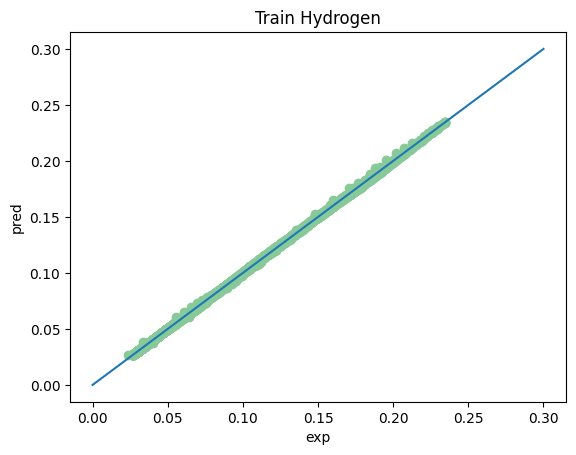

In [19]:
y = y_pred[:,1]
x = ytr[:,1]

y = y.detach().numpy()
x = x.detach().numpy()

#x = (x*(138.014-0.01438699))+0.01438699
#y = (y*(138.014-0.01438699))+0.01438699

x = (x*(0.234801988-0.011447075))+0.011447075
y = (y*(0.234801988-0.011447075))+0.011447075

plt.scatter(x,y, color = '#88c999')

x1 = np.linspace(0,0.3,100)
y1 = x1 
plt.plot(y1,x1)
plt.xlabel("exp")
plt.ylabel('pred')
plt.title('Train Hydrogen')
plt.show()

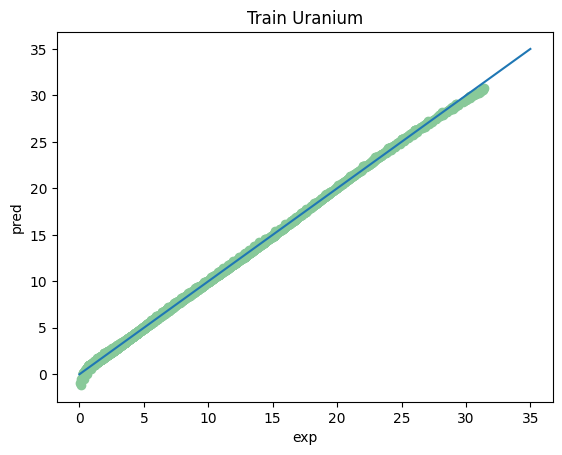

In [20]:
yu = y_pred[:,0]
xu = ytr[:,0]

yu = yu.detach().numpy()
xu = xu.detach().numpy()

#x = (x*(138.014-0.01438699))+0.01438699
#y = (y*(138.014-0.01438699))+0.01438699

xu = (xu*(31.39216917-0.01438699))+0.01438699
yu = (yu*(31.39216917-0.01438699))+0.01438699

plt.scatter(xu,yu, color = '#88c999')

x1 = np.linspace(0,35,100)
y1 = x1 
plt.plot(y1,x1)
plt.xlabel("exp")
plt.ylabel('pred')
plt.title('Train Uranium')
plt.show()

In [21]:
with torch.no_grad():
    model1.eval()
    y_pred1 = model1(xte)
    l = loss(y_pred1,yte)
    rmse = torch.sqrt(l)
    test_rmse = rmse/100
print(f"MSE : {l} | RMSE : {rmse}")

MSE : 7.197156264737714e-06 | RMSE : 0.0026827515102922916


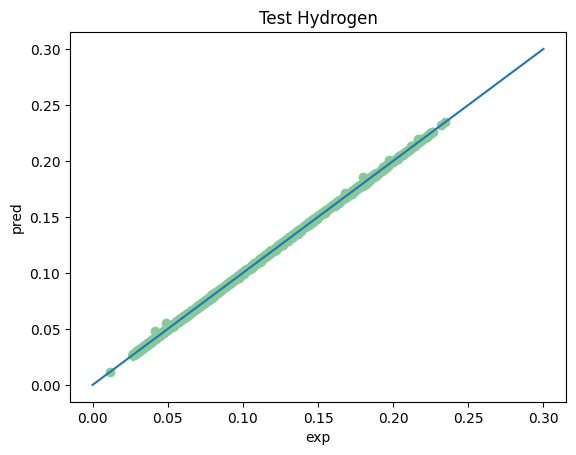

In [22]:
yth = y_pred1[:,1]
xth = yte[:,1]

yth = yth.detach().numpy()
xth = xth.detach().numpy()

#x = (x*(138.014-0.01438699))+0.01438699
#y = (y*(138.014-0.01438699))+0.01438699

xth = (xth*(0.234801988-0.011447075))+0.011447075
yth = (yth*(0.234801988-0.011447075))+0.011447075

plt.scatter(xth,yth, color = '#88c999')

x1 = np.linspace(0,0.3,100)
y1 = x1 
plt.plot(y1,x1)
plt.title('Test Hydrogen')
plt.xlabel("exp")
plt.ylabel('pred')
plt.show()

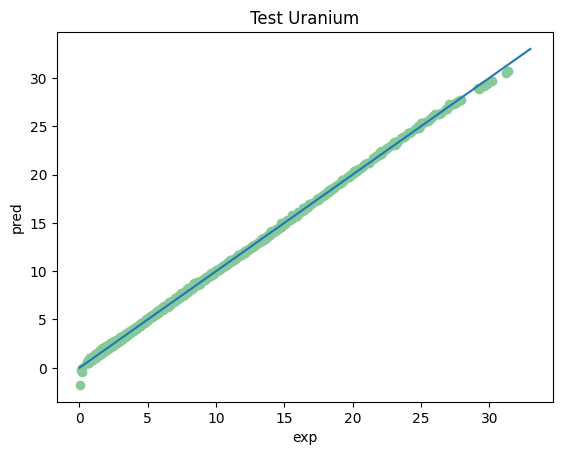

In [23]:
ytu = y_pred1[:,0]
xtu = yte[:,0]

ytu = ytu.detach().numpy()
xtu = xtu.detach().numpy()

#x = (x*(138.014-0.01438699))+0.01438699
#y = (y*(138.014-0.01438699))+0.01438699

xtu = (xtu*(31.39216917-0.01438699))+0.01438699
ytu = (ytu*(31.39216917-0.01438699))+0.01438699

plt.scatter(xtu,ytu, color = '#88c999')

x1 = np.linspace(0,33,100)
y1 = x1 
plt.plot(y1,x1)
plt.title('Test Uranium')
plt.xlabel("exp")
plt.ylabel('pred')
plt.show()

In [24]:
print(model1.parameters)

<bound method Module.parameters of model(
  (layer1): Linear(in_features=2, out_features=7, bias=True)
  (layer3): Linear(in_features=7, out_features=5, bias=True)
  (layer4): Linear(in_features=5, out_features=2, bias=True)
)>
